<a href="https://colab.research.google.com/github/Kopfgeldjaeger/Medium_blogs_code/blob/master/3_pandas_factory/outbound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os
import numpy as np

In [3]:
os.getcwd()
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/blogs_medium')

In [4]:
!ls

 2019_outbound.xlsx	     KGT_4class.ipynb
 4_class_dataset.zip	    'Kopie von covid-19.ipynb'
 Barplot_examples.ipynb      LeNet_Gridsearch_cat_dog.ipynb
 binary_dataset.zip	     OCR.ipynb
 Binary_KGT.ipynb	     outbound_2019.ipynb
 cat_dog.zip		     outbound.ipynb
 CNN_models		     outbound.xlsx
 coronavirus_germany.ipynb   Untitled0.ipynb
 Gridsearch_cat_dag.ipynb    vg2500_geo84.zip
 Hero2monster.ipynb	     Visualization_coronavirus_germany.ipynb


In [5]:
df2018= pd.read_excel("outbound.xlsx",sheet_name='2018',header=0)
df2019= pd.read_excel("outbound.xlsx",sheet_name='2019',header=0)
frames =[df2018, df2019]
df= pd.concat(frames)
df
os.chdir('/content')

In [6]:
df.columns = ['date','FAW','company','type','rolls','weight']
df['date'] = pd.to_datetime(df['date']) 
df = df.set_index('date') 
print(df.head(2))
print(df.tail(2))
print(df.shape)

            FAW company type  rolls  weight
date                                       
2018-02-28  100     NaN  全长丝    100  2500.0
2018-03-01  150      永丰   半光    150  4209.6
            FAW company type  rolls  weight
date                                       
2019-12-31  140      华港  全长丝     97  2718.5
2019-12-31  120      天龙  全长丝     36   900.7
(675, 5)


In [7]:
print(df.index)

DatetimeIndex(['2018-02-28', '2018-03-01', '2018-03-02', '2018-03-07',
               '2018-03-08', '2018-03-10', '2018-03-11', '2018-03-11',
               '2018-03-13', '2018-03-13',
               ...
               '2019-12-27', '2019-12-27', '2019-12-29', '2019-12-29',
               '2019-12-29', '2019-12-29', '2019-12-31', '2019-12-31',
               '2019-12-31', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=675, freq=None)


In [8]:
print(df.resample('M').sum().to_period('M'))

           FAW  rolls    weight
date                           
2018-02    100    100    2500.0
2018-03   4555   2462   68155.3
2018-04   2575   3060   83384.4
2018-05   1795   2758   70847.2
2018-06   2680   4306  118293.6
2018-07   3350   3069   89438.8
2018-08   1935   3110   90171.3
2018-09   2895   3662  100237.6
2018-10   3590   3238   84930.1
2018-11   5674   3798   97850.8
2018-12   4080   3046   81008.0
2019-01   3404   2336   64238.9
2019-02   1048    624   17508.1
2019-03   8742   4148  113754.0
2019-04   4104   3696  102348.9
2019-05   7256   4066  111155.0
2019-06   5525   3996  106767.1
2019-07   6673   4071  107647.6
2019-08   6661   3806  106972.1
2019-09   4413   3727  105760.1
2019-10   5263   3326   90579.6
2019-11   7187   4488  112707.0
2019-12  11708   4825  115191.8


In [9]:
df.resample('M').sum().to_period('M').index

PeriodIndex(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
             '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01',
             '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
             '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]', name='date', freq='M')

In [10]:
month_df=df.resample('M').sum().to_period('M')

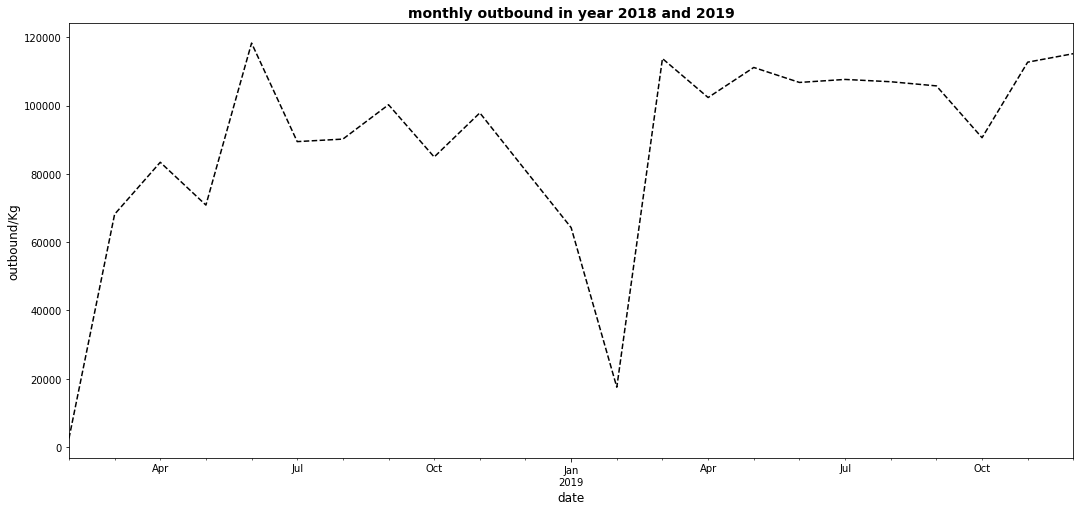

In [11]:
fig, ax = plt.subplots(figsize=(18,8))
ax= month_df['weight'].plot(style="k--", label="Series")
ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("outbound/Kg", fontsize=12)
ax.set_title('monthly outbound in year 2018 and 2019',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('barplot.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

In [ ]:
print(df.resample('D').sum().to_period('D'))

            FAW  rolls  weight
date                          
2018-02-28  100    100  2500.0
2018-03-01  150    150  4209.6
2018-03-02  215    180  5411.7
2018-03-03    0      0     0.0
2018-03-04    0      0     0.0
...         ...    ...     ...
2019-12-27  600    275  7864.5
2019-12-28    0      0     0.0
2019-12-29  600    267  7362.2
2019-12-30    0      0     0.0
2019-12-31  600    224  6172.5

[672 rows x 3 columns]


In [ ]:
new_df=df.resample('D').sum().to_period('D')
print(new_df)
outbound=new_df.iloc[:,2]
rolls=new_df.iloc[:,1]
xlabels = new_df.index
print(xlabels)
N= len(xlabels)

            FAW  rolls  weight
date                          
2018-02-28  100    100  2500.0
2018-03-01  150    150  4209.6
2018-03-02  215    180  5411.7
2018-03-03    0      0     0.0
2018-03-04    0      0     0.0
...         ...    ...     ...
2019-12-27  600    275  7864.5
2019-12-28    0      0     0.0
2019-12-29  600    267  7362.2
2019-12-30    0      0     0.0
2019-12-31  600    224  6172.5

[672 rows x 3 columns]
PeriodIndex(['2018-02-28', '2018-03-01', '2018-03-02', '2018-03-03',
             '2018-03-04', '2018-03-05', '2018-03-06', '2018-03-07',
             '2018-03-08', '2018-03-09',
             ...
             '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
             '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
             '2019-12-30', '2019-12-31'],
            dtype='period[D]', name='date', length=672, freq='D')


In [ ]:
ind = np.arange(N)

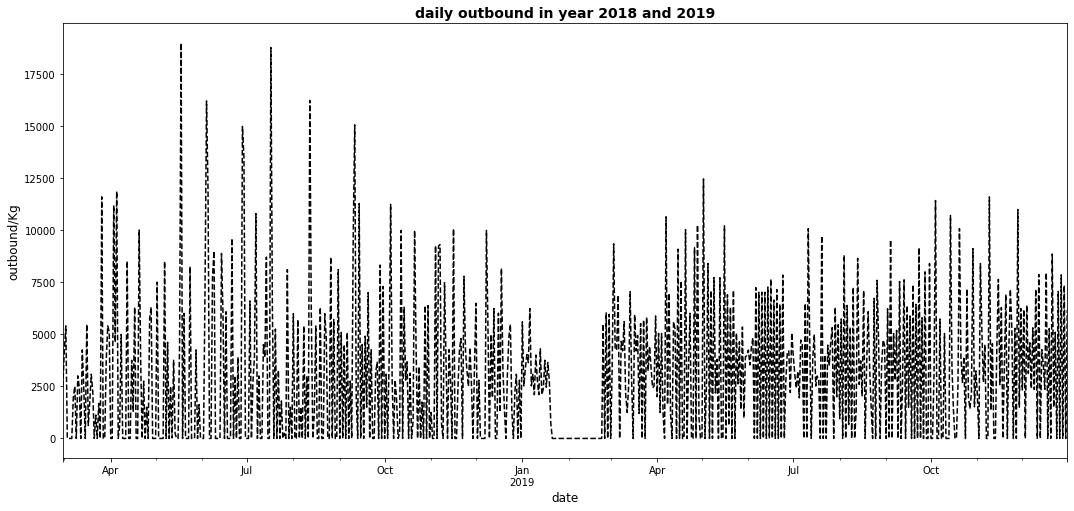

In [ ]:
interpolated = new_df.interpolate(method='linear')
fig, ax = plt.subplots(figsize=(18,8))
ax= interpolated['weight'].plot(style="k--", label="Series")
ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("outbound/Kg", fontsize=12)
ax.set_title('daily outbound in year 2018 and 2019',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('barplot1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

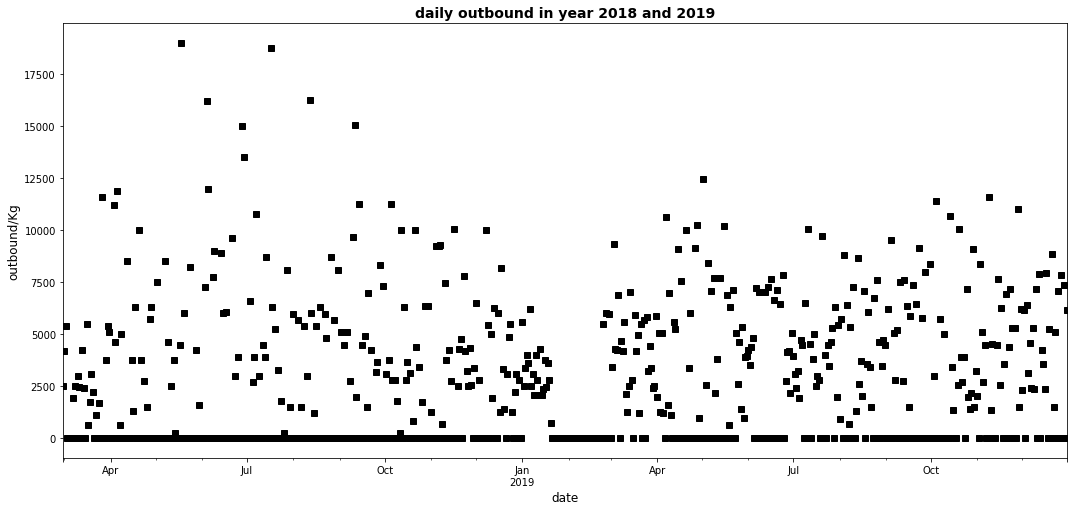

In [ ]:
interpolated = new_df.interpolate(method='linear')
fig, ax = plt.subplots(figsize=(18,8))
ax= interpolated['weight'].plot(style="ks")
ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("outbound/Kg", fontsize=12)
ax.set_title('daily outbound in year 2018 and 2019',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('barplot2.png',dpi=100, format='png', bbox_inches='tight')
plt.show()